In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import \
 (LinearDiscriminantAnalysis as LDA,
 QuadraticDiscriminantAnalysis as QDA)
from sklearn.neighbors import KNeighborsClassifier


In [2]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


## 1. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.



### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [3]:
median = Auto['mpg'].median()
median

np.float64(22.75)

In [4]:
Auto['mpg01'] = (Auto['mpg'] > median).astype(int)

In [5]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings. 

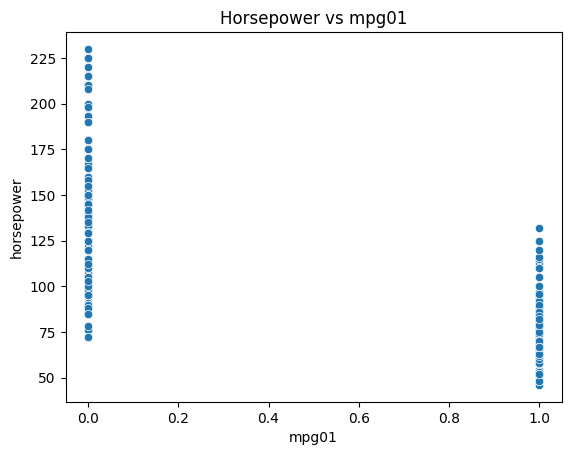

In [6]:
sns.scatterplot(x="mpg01", y="horsepower", data=Auto)
plt.title('Horsepower vs mpg01')
plt.show()

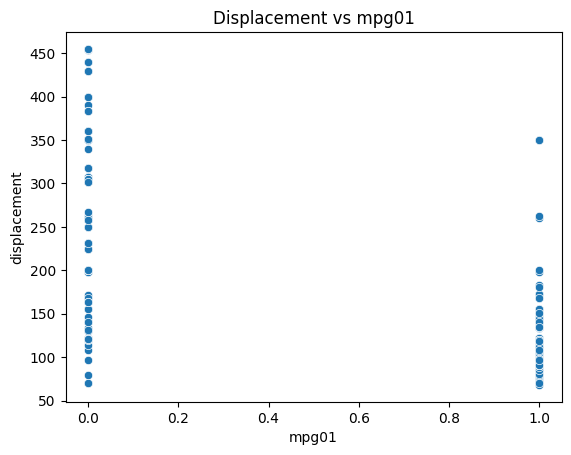

In [7]:
sns.scatterplot(x="mpg01", y="displacement", data=Auto)
plt.title('Displacement vs mpg01')
plt.show()

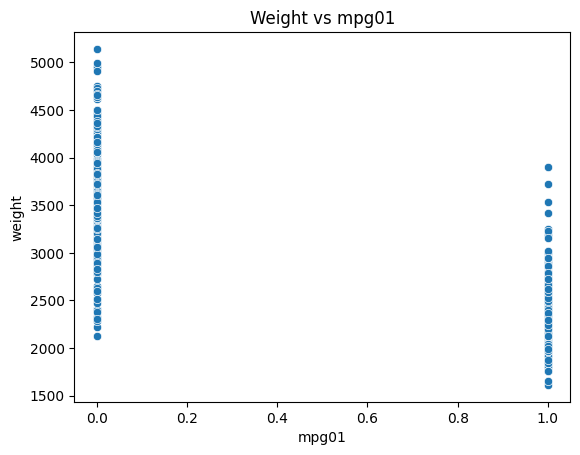

In [8]:

sns.scatterplot(x="mpg01", y="weight", data=Auto)
plt.title('Weight vs mpg01')
plt.show()

Boxplot

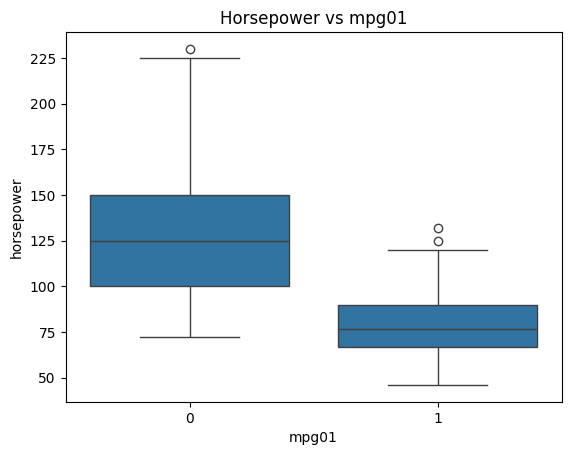

In [9]:
sns.boxplot(x="mpg01", y="horsepower", data=Auto)
plt.title('Horsepower vs mpg01')
plt.show()

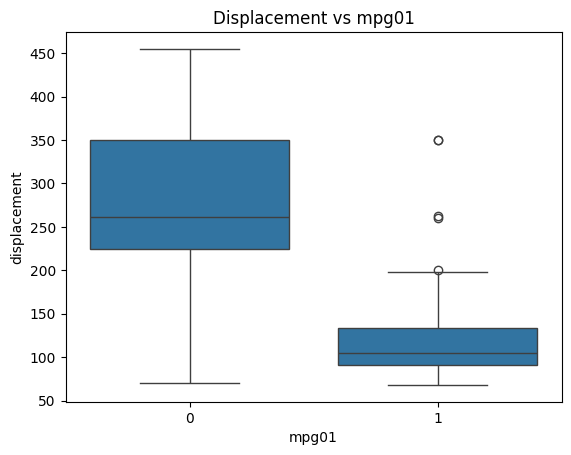

In [10]:
sns.boxplot(x="mpg01", y="displacement", data=Auto)
plt.title('Displacement vs mpg01')
plt.show()

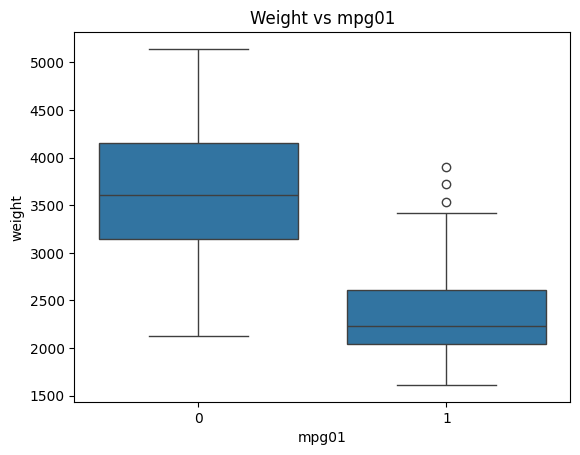

In [11]:

sns.boxplot(x="mpg01", y="weight", data=Auto)
plt.title('Weight vs mpg01')
plt.show()

### (c)	 Split the data into a training set and a test set.

In [12]:
x= Auto[['cylinders','displacement','horsepower']]
y= Auto['mpg01']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


### (d)	Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained? 

In [13]:
lda = LDA(store_covariance=True)

In [14]:
lda.fit(x_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


In [15]:
lda_pred = lda.predict(x_test)

In [16]:
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,48,2
1,17,51


### (e)	Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained? 

In [17]:
qda = QDA(store_covariance=True)

In [18]:
qda.fit(x_train, y_train)

,priors,None
,reg_param,0.0
,store_covariance,True
,tol,0.0001


In [19]:
qda_pred = qda.predict(x_test)

In [20]:
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,52,3
1,13,50


### (f)	Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [21]:
x = MS(x_train).fit_transform(x_train)
y = y_train
result = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(result.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  274
Model:                            GLM   Df Residuals:                      270
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69.555
Date:                Mon, 15 Sep 2025   Deviance:                       139.11
Time:                        21:17:28   Pearson chi2:                     561.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5838
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        9.7384      1.600      6.086   

### (g)	Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [22]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(x_train, y_train)
knn2_pred = knn2.predict(x_test)
confusion_table(knn2_pred, y_test)

Truth,0,1
Predicted,,
0,55,7
1,10,46


In [23]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_pred = knn3.predict(x_test)
confusion_table(knn3_pred, y_test)

Truth,0,1
Predicted,,
0,51,3
1,14,50
